# Validate LONGITUDE MODELS

In [1]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tools
from sklearn.model_selection import train_test_split

# regression model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# To save the ML models
import joblib

# Functions

In [2]:
def makePredictions(loaded_model, X_test, y_test):
    model_predictions = loaded_model.predict(X_test)

    r2 = round(r2_score(y_test,model_predictions),3)
    mae = round(mean_absolute_error(y_test,model_predictions),3)
    mse = round(mean_squared_error(y_test,model_predictions),3)
    
    print("R^2 from loaded model : {}".format(r2))
#    print("MAE from loaded model : {}".format(mae))
    print("MSE from loaded model : {}".format(mse))
    
    
    return r2, mse

In [3]:
def lolipop (values, group, xmin, title, xlabel, ylabel, color, output_file):
# Create a dataframe of r2
    df = pd.DataFrame({'values': values,
                       'group': group })

    # Reorder it based on the valuesc
    ordered_df = df.sort_values(by='values')
    my_range=range(1,len(df.index)+1)

    plt.style.use('fivethirtyeight')
    
    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=xmin, xmax=ordered_df['values'], color=color)
    
    
    plt.plot(ordered_df['values'], my_range, "o")

    # Add titles and axis names
    plt.yticks(my_range, ordered_df['group'])
    plt.title(title, loc='left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #plt.figure(figsize=(6, 6))
    plt.rcParams['figure.figsize'] = [10, 5]

    plt.savefig(output_file, format= "png",bbox_inches='tight' )
    
    # Show the plot
    plt.show()


In [4]:
def load_model (file_name):
    path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/MLmodels/'
 
    # Load the model from the file
    model_from_joblib = joblib.load(path + file_name)
    
    return model_from_joblib

# Load Data

In [5]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file_X = "4_Val_DataPrepro_LON_X.csv"
file_y = "4_Val_DataPrepro_LON_y.csv"

X = pd.read_csv(path + file_X)
y = pd.read_csv(path + file_y)

# Train/Test Split

As this is validation data, only used to thest the trained model, there is no need to divide into train/test. The 100% of this unseen data will be used to validate the models. 

### Load DecissionTreeRegressor

In [6]:
file = 'LON_DTR.joblib'

# Load the model from the file
DTR_from_joblib = load_model(file)

# Use the loaded model to make predictions
DTR_r2, DTR_mse = makePredictions(DTR_from_joblib, X, y)

R^2 from loaded model : 0.956
MSE from loaded model : 638.967


### Load kNreg

In [7]:
file = 'LON_KNreg.joblib'

# Load the model from the file
KNreg_from_joblib = load_model(file)

# Use the loaded model to make predictions
KNreg_r2, KNreg_mse = makePredictions(KNreg_from_joblib,X, y)

R^2 from loaded model : 0.968
MSE from loaded model : 468.913


### Load Multi-layer Perceptron regressor

In [8]:
file = 'LON_MLP.joblib'

# Load the model from the file
MLP_from_joblib = load_model(file)

# Use the loaded model to make predictions
MLP_r2, MLP_mse = makePredictions(MLP_from_joblib,X, y)

R^2 from loaded model : -0.682
MSE from loaded model : 24290.154


### Load Support Vector Regression 

In [9]:
file = 'LON_SVR.joblib'

# Load the model from the file
SVR_from_joblib = load_model(file)

# Use the loaded model to make predictions
SVR_r2, SVR_mse = makePredictions(SVR_from_joblib,X, y)

R^2 from loaded model : 0.944
MSE from loaded model : 804.503


# Comparing Models

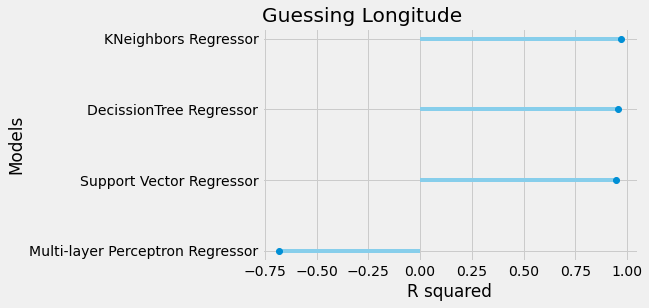

In [10]:
values= [DTR_r2, KNreg_r2, MLP_r2, SVR_r2]
group = ('DecissionTree Regressor', 'KNeighbors Regressor','Multi-layer Perceptron Regressor', 'Support Vector Regressor')
xmin = 0
title = 'Guessing Longitude'
xlabel = 'R squared' 
ylabel = 'Models'
color = 'skyblue'

lolipop (values, group, xmin, title, xlabel, ylabel, color, "LON_r2_all");

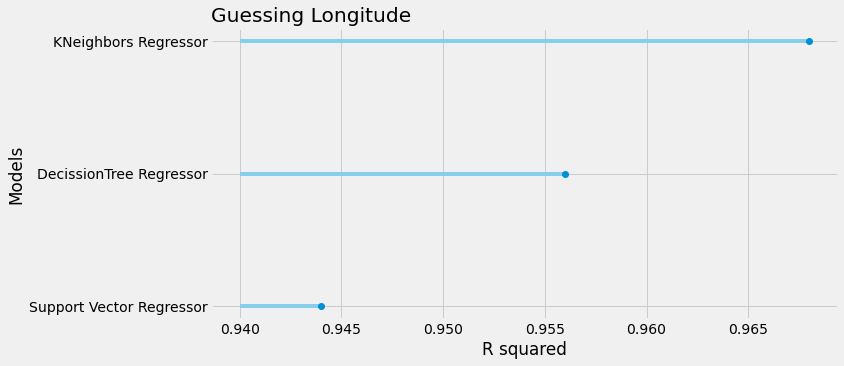

In [11]:
values= [DTR_r2, KNreg_r2, SVR_r2]
group = ('DecissionTree Regressor', 'KNeighbors Regressor', 'Support Vector Regressor')
xmin = 0.94
title = 'Guessing Longitude'
xlabel = 'R squared' 
ylabel = 'Models'
color = 'skyblue'

lolipop (values, group, xmin, title, xlabel, ylabel, color, "LON_r2_3");

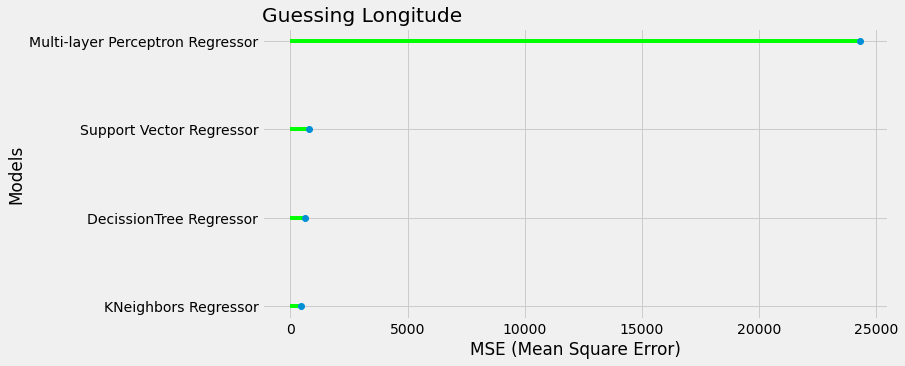

In [12]:
values= [DTR_mse, KNreg_mse, SVR_mse, MLP_mse]
group = ('DecissionTree Regressor', 'KNeighbors Regressor', 'Support Vector Regressor','Multi-layer Perceptron Regressor')
xmin = 0
title = 'Guessing Longitude'
xlabel = 'MSE (Mean Square Error)' 
ylabel = 'Models'
color = 'lime'

lolipop (values, group, xmin, title, xlabel, ylabel, color, "LON_mse_all")

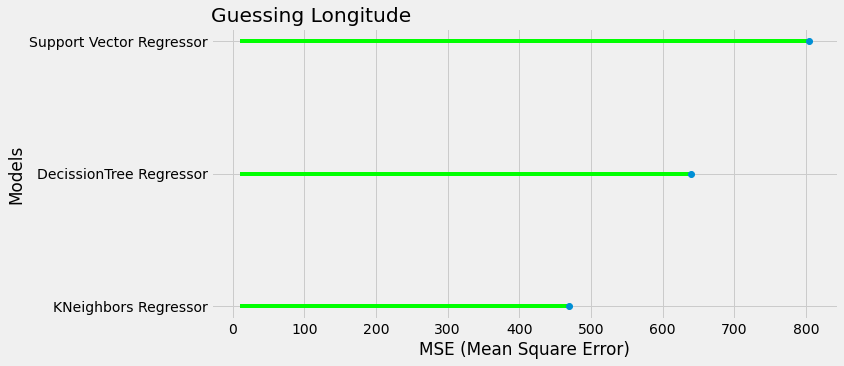

In [13]:
values= [DTR_mse, KNreg_mse, SVR_mse]
group = ('DecissionTree Regressor', 'KNeighbors Regressor', 'Support Vector Regressor')
xmin = 10
title = 'Guessing Longitude'
xlabel = 'MSE (Mean Square Error)'
ylabel = 'Models'
color = 'lime'

lolipop (values, group, xmin, title, xlabel, ylabel, color, "LON_mse_3")